# Importando Bibliotecas

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from PIL import Image, ImageDraw
from torch.autograd import Variable

# Preparação dos Dados

torch.Size([10, 1])
torch.Size([10, 1])


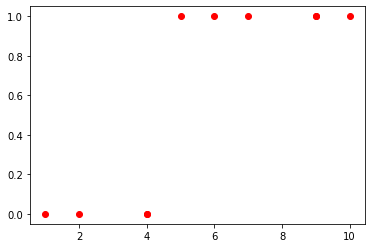

In [22]:
x_numpy = np.array([5,7,2,9,4,10,9,4,6,1])
y_numpy = np.array([1,1,0,1,0,1,1,0,1,0])

x = torch.from_numpy(x_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
x = x.view(x.shape[0], 1)

print(x.shape)
print(y.shape)

plt.plot(x_numpy, y_numpy, 'ro')

# Classe de Regressão Logística

In [23]:
class RegressaoLogistica(nn.Module):
  def __init__(self, n_input, n_output):
    super(RegressaoLogistica, self).__init__()
    self.Linear = nn.Linear(n_input, 1)

  def forward(self, x):
    y_hat = torch.sigmoid(self.Linear(x))
    return y_hat

# Definição do Modelo

In [24]:
input_size = 1
output_size = 1
model = RegressaoLogistica(1,1)

# Definição da Função de Custo e Otimizador

In [25]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print (model.parameters())

<generator object Module.parameters at 0x7fd32a40e8d0>


# Loop de Treinamento

In [26]:
num_epochs = 200
contador_custo = []
for epoch in range(num_epochs):
  # forward pass and loos
  y_hat = model(x)
  loss = criterion(y_hat, y)
  contador_custo.append(loss)
  #print(y_hat)

  
  # backward pass (calcular gradientes)
  loss.backward()

  # update (atualizar os pesos)
  optimizer.step()

  if (epoch+1)%10 == 0:
      print("===============================")
      print('Epoch: ', epoch)
      print('Custo: {:.20f}'.format(loss.item())) 
      print('m: {:.5f}'.format(model.Linear.weight.data.detach().item()))
      print('m (gradiente): {:.5f}'.format(model.Linear.weight.grad.detach().item()))
      print('b: {:.5f}'.format(model.Linear.bias.data.detach().item()))
      print('b (gradiente): {:.5f}'.format(model.Linear.bias.grad.detach().item()))
     
  # limpar o otimizador
  optimizer.zero_grad()

Epoch:  9
Custo: 0.63114619255065917969
m: 0.07456
m (gradiente): -0.34656
b: 0.57461
b (gradiente): 0.12542
Epoch:  19
Custo: 0.62252062559127807617
m: 0.09871
m (gradiente): -0.17719
b: 0.56058
b (gradiente): 0.14933
Epoch:  29
Custo: 0.61820518970489501953
m: 0.11180
m (gradiente): -0.10144
b: 0.54501
b (gradiente): 0.15977
Epoch:  39
Custo: 0.61488783359527587891
m: 0.11970
m (gradiente): -0.06460
b: 0.52874
b (gradiente): 0.16454
Epoch:  49
Custo: 0.61184042692184448242
m: 0.12503
m (gradiente): -0.04589
b: 0.51215
b (gradiente): 0.16664
Epoch:  59
Custo: 0.60888212919235229492
m: 0.12904
m (gradiente): -0.03615
b: 0.49544
b (gradiente): 0.16740
Epoch:  69
Custo: 0.60596531629562377930
m: 0.13234
m (gradiente): -0.03100
b: 0.47869
b (gradiente): 0.16748
Epoch:  79
Custo: 0.60307663679122924805
m: 0.13528
m (gradiente): -0.02825
b: 0.46196
b (gradiente): 0.16720
Epoch:  89
Custo: 0.60021269321441650391
m: 0.13801
m (gradiente): -0.02675
b: 0.44526
b (gradiente): 0.16674
Epoch:  99


# Plot do Gráfico da Função de Custo

Gráfico da Função de Custo


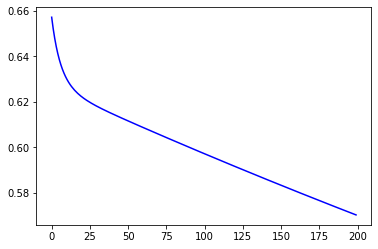

In [28]:
print("Gráfico da Função de Custo")
plt.plot(contador_custo, 'b')
plt.show()

# Cálculo da predição

In [29]:
teste = np.array([2, 3, 6, 7, 8])
t_teste = torch.from_numpy(teste.astype(np.float32))
t_teste = t_teste.view(t_teste.shape[0], 1)

with torch.no_grad():
  predicoes = model(t_teste)
  for x, y in zip(t_teste, predicoes):
    # definindo o cutoff / threshold
    status = ""
    if (y >= 0.7):
      status = "aprovado"
    else:
      status = "reprovado"
    print ('x: {:.2f} | ŷ: {:.2f} | '.format(x.detach().item(),y.detach().item()), status)

x: 2.00 | ŷ: 0.64 |  reprovado
x: 3.00 | ŷ: 0.68 |  reprovado
x: 6.00 | ŷ: 0.78 |  aprovado
x: 7.00 | ŷ: 0.81 |  aprovado
x: 8.00 | ŷ: 0.83 |  aprovado
